# Problem Overview 

In this project, our goal is to assess the risk status associated with a project. By analyzing various project-related factors, we aim to provide insights into the potential risks involved in its execution. The project involves the development of a predictive model that can accurately classify projects into different risk categories based on several attributes.

### Importing Neccessary Libraries

In [47]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [2]:
df=pd.read_csv("merged_data.csv")
df.head()

,Project Name,Email,Industry,Sentiment,Project Deadline,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,Lynn LLC,ilarson@example.com,Technology,Neutral,2024-04-25,Completed,Small,5,1,5,Qualified
1,Jackson Inc,robertlong@example.org,Healthcare,Negative,2024-05-04,Completed,Small,3,4,1,Qualified
2,Fowler Inc,sharon44@example.net,Technology,Neutral,2024-05-04,Incomplete,Large,1,9,5,Negotiation
3,Riggs and Sons,jessica70@example.org,Retail,Positive,2024-05-19,Incomplete,Medium,4,8,4,Closed-Won
4,Murray-Aguirre,savannah57@example.net,Technology,Negative,2024-05-11,Incomplete,Medium,1,7,1,Closed-Won


In [3]:
df.isna().sum()

Project Name         0
Email                0
Industry             0
Sentiment            0
Project Deadline     0
Completion Status    0
Customer Size        0
CSAT                 0
NPS                  0
CES                  0
Lead Status          0
dtype: int64

In [4]:
df.drop(["Project Name","Email","Project Deadline"],axis=1,inplace=True)

In [5]:
df.head()

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,Technology,Neutral,Completed,Small,5,1,5,Qualified
1,Healthcare,Negative,Completed,Small,3,4,1,Qualified
2,Technology,Neutral,Incomplete,Large,1,9,5,Negotiation
3,Retail,Positive,Incomplete,Medium,4,8,4,Closed-Won
4,Technology,Negative,Incomplete,Medium,1,7,1,Closed-Won


In [6]:
df.columns

Index(['Industry', 'Sentiment', 'Completion Status', 'Customer Size', 'CSAT',
       'NPS', 'CES', 'Lead Status'],
      dtype='object')

### Understanding the terms

CSAT (Customer Satisfaction Score): CSAT measures the level of satisfaction that customers have with a specific interaction, product, or service. It's typically measured by asking customers to rate their satisfaction on a scale, often from 1 to 5 or from 1 to 10. A higher CSAT score indicates higher customer satisfaction.

NPS (Net Promoter Score): NPS measures the likelihood of customers to recommend a company's product or service to others. It's based on a single question: "On a scale of 0 to 10, how likely are you to recommend our product/service to a friend or colleague?" Customers are segmented into Promoters (score 9-10), Passives (score 7-8), and Detractors (score 0-6), and the NPS is calculated by subtracting the percentage of Detractors from the percentage of Promoters. A higher NPS indicates more positive word-of-mouth and customer loyalty.

CES (Customer Effort Score): CES measures the level of effort customers have to put in to use a product or service. It's typically measured by asking customers to rate their agreement with statements related to ease of use or simplicity of a process. A lower CES score indicates that customers find it easier to interact with the company or use its products/services, reflecting a better customer experience.

### Risk Factor Calculation

Defining a function to calculate the risk factor based on project attributes such as completion status, sentiment, customer feedback scores, and lead status.

In [7]:
def risk_factor(row):
    if row['Completion Status'] == 'Completed':
        if row['Sentiment'] == 'Positive' and row['Lead Status'] == 'Closed-Won':
            if row['CSAT'] >= 3 and row['NPS'] >= 7 and row['CES'] <= 3:
                return 'No Risk'
            else:
                return 'Medium Risk'
        else:
            return 'Medium Risk'
    else:
        if row['Customer Size'] == 'Large':
            return 'High Risk'
        else:
            return 'Medium Risk'

In [8]:
df["Risk Factor"]=df.apply(risk_factor, axis=1)

In [9]:
df.head()

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status,Risk Factor
0,Technology,Neutral,Completed,Small,5,1,5,Qualified,Medium Risk
1,Healthcare,Negative,Completed,Small,3,4,1,Qualified,Medium Risk
2,Technology,Neutral,Incomplete,Large,1,9,5,Negotiation,High Risk
3,Retail,Positive,Incomplete,Medium,4,8,4,Closed-Won,Medium Risk
4,Technology,Negative,Incomplete,Medium,1,7,1,Closed-Won,Medium Risk


In [10]:
df["Risk Factor"].isna().sum()

0

### Creating hashmaps

creating mappings to convert categorical variables into numerical values for model training. 

This step ensures compatibility with machine learning algorithms.

In [11]:
mappings = {
    'Industry': {'Finance': 0, 'Healthcare': 1, 'Retail': 2, 'Technology': 3},
    'Sentiment': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Completion Status': {'Completed': 0, 'Incomplete': 1},
    'Customer Size': {'Medium': 0, 'Small': 1, 'Large': 2},
    'Lead Status': {'Negotiation': 0, 'New': 1, 'Contacted': 2, 'Closed-Won': 3, 'Closed-Lost': 4, 'Opportunity': 5, 'Qualified': 6, 'Engaged': 7}
}

In [12]:
for i, row in df.iterrows():
    for column, reverse_mapping in mappings.items():
        df.at[i, column] = reverse_mapping.get(row[column], row[column])


In [13]:
df.head()

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status,Risk Factor
0,3,1,0,1,5,1,5,6,Medium Risk
1,1,0,0,1,3,4,1,6,Medium Risk
2,3,1,1,2,1,9,5,0,High Risk
3,2,2,1,0,4,8,4,3,Medium Risk
4,3,0,1,0,1,7,1,3,Medium Risk


In [14]:
x=df.drop("Risk Factor",axis=1)
x.head()

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,3,1,0,1,5,1,5,6
1,1,0,0,1,3,4,1,6
2,3,1,1,2,1,9,5,0
3,2,2,1,0,4,8,4,3
4,3,0,1,0,1,7,1,3


In [15]:
y=df["Risk Factor"]

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
xtrain.isna().sum()

Industry             0
Sentiment            0
Completion Status    0
Customer Size        0
CSAT                 0
NPS                  0
CES                  0
Lead Status          0
dtype: int64

In [18]:
ytrain.isna().sum()

0

In [19]:
ytrain.info()

<class 'pandas.core.series.Series'>
Index: 8000 entries, 9254 to 7270
Series name: Risk Factor
Non-Null Count  Dtype 
--------------  ----- 
8000 non-null   object
dtypes: object(1)
memory usage: 125.0+ KB


### Handling imbalanced data

In [20]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

### Model Development

Training a Random Forest Classifier using the balanced dataset to predict project risk levels. The model learns from the input features and associated risk factors to make accurate predictions.

In [21]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rfc.fit(x_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [23]:
ytrain.value_counts()

Risk Factor
Medium Risk    6688
High Risk      1288
No Risk          24
Name: count, dtype: int64

In [24]:
ytest.value_counts()

Risk Factor
Medium Risk    1675
High Risk       320
No Risk           5
Name: count, dtype: int64

### Model Evaluation
Evaluating the trained model's performance using metrics such as accuracy, precision, recall, and F1-score to assess its effectiveness in predicting project risk.

In [25]:
ypred = rfc.predict(xtest)
accuracy_rf = accuracy_score(ytest, ypred)
print("Accuracy with Random Forest Classifier:", accuracy_rf)
print("Classification Report with Random Forest Classifier:")
print(classification_report(ytest, ypred))

Accuracy with Random Forest Classifier: 0.9995
Classification Report with Random Forest Classifier:
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       320
 Medium Risk       1.00      1.00      1.00      1675
     No Risk       1.00      0.80      0.89         5

    accuracy                           1.00      2000
   macro avg       1.00      0.93      0.96      2000
weighted avg       1.00      1.00      1.00      2000



### Distribution of Risk Factors

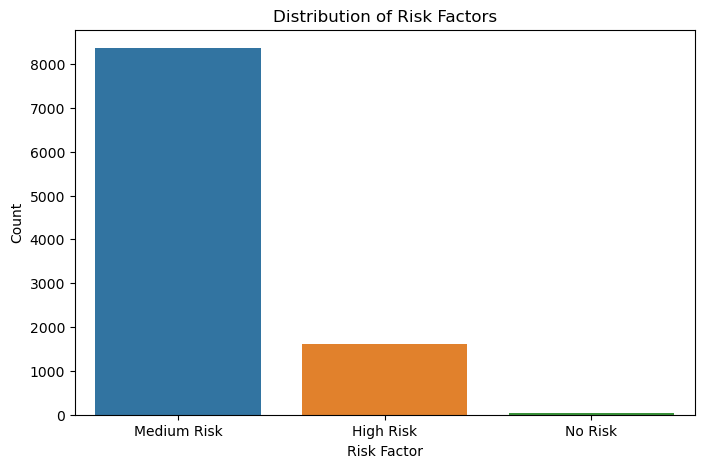

In [50]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Risk Factor")
plt.title("Distribution of Risk Factors")
plt.xlabel("Risk Factor")
plt.ylabel("Count")
plt.show()


### Feature Importance

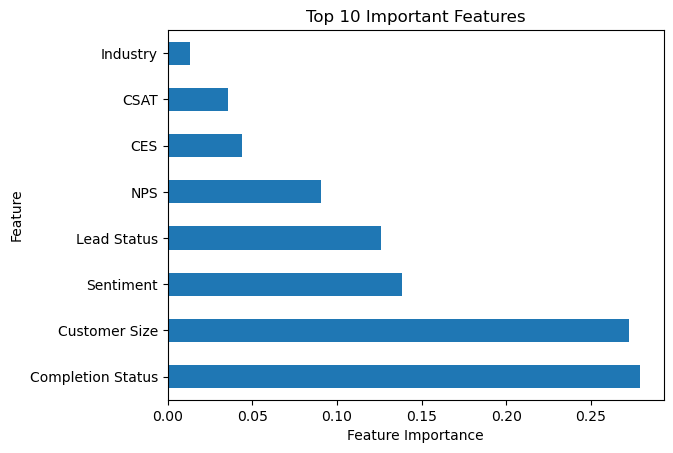

In [43]:
feature_importance = pd.Series(rfc.feature_importances_, index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

# Making Predictions

### Predicting for "No Risk" value

In [26]:
df[df["Risk Factor"]=="No Risk"].iloc[:3]

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status,Risk Factor
195,2,2,0,1,4,10,2,3,No Risk
351,1,2,0,0,4,9,1,3,No Risk
845,0,2,0,0,5,10,1,3,No Risk


'Industry': {'Finance': 0, 'Healthcare': 1, 'Retail': 2, 'Technology': 3},
    'Sentiment': {'Negative': 0, 'Neutral': 1, 'Positive': 2},
    'Completion Status': {'Completed': 0, 'Incomplete': 1},
    'Customer Size': {'Medium': 0, 'Small': 1, 'Large': 2},
    'Lead Status': {'Negotiation': 0, 'New': 1, 'Contacted': 2, 'Closed-Won': 3, 'Closed-Lost': 4, 'Opportunity': 5, 'Qualified': 6, 'Engaged': 7}


In [27]:
data = {
    "Industry": 1,
    "Sentiment": 2,
    "Completion Status": 0,
    "Customer Size": 0,
    "CSAT": 4,
    "NPS": 9,
    "CES": 1,
    "Lead Status": 3
}

In [28]:
df3=pd.DataFrame([data])
df3

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,1,2,0,0,4,9,1,3


In [29]:
"".join(rfc.predict(df3))

'No Risk'

In [30]:
data = {
    "Industry": 2,
    "Sentiment": 2,
    "Completion Status": 0,
    "Customer Size": 1,
    "CSAT": 4,
    "NPS": 10,
    "CES": 2,
    "Lead Status": 3
}

In [31]:
df1=pd.DataFrame([data])
df1

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,2,2,0,1,4,10,2,3


In [32]:
"".join(rfc.predict(df1))

'No Risk'

### Predicting for "Medium Risk" value

In [33]:
df[df["Risk Factor"]=="Medium Risk"].iloc[:3]

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status,Risk Factor
0,3,1,0,1,5,1,5,6,Medium Risk
1,1,0,0,1,3,4,1,6,Medium Risk
3,2,2,1,0,4,8,4,3,Medium Risk


In [34]:
data = {
    "Industry": 3,
    "Sentiment": 1,
    "Completion Status": 0,
    "Customer Size": 1,
    "CSAT": 5,
    "NPS": 1,
    "CES": 5,
    "Lead Status": 6
}

In [35]:
df2=pd.DataFrame([data])
df2

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,3,1,0,1,5,1,5,6


In [36]:
"".join(rfc.predict(df2))

'Medium Risk'

### Predicting for "High Risk" Value

In [37]:
df[df["Risk Factor"]=="High Risk"].iloc[:3]

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status,Risk Factor
2,3,1,1,2,1,9,5,0,High Risk
10,3,1,1,2,2,7,2,6,High Risk
11,0,2,1,2,2,4,5,4,High Risk


In [38]:
data = {
    "Industry": 3,
    "Sentiment": 1,
    "Completion Status": 1,
    "Customer Size": 2,
    "CSAT": 1,
    "NPS": 9,
    "CES": 5,
    "Lead Status": 0
}

In [39]:
df3=pd.DataFrame([data])
df3

,Industry,Sentiment,Completion Status,Customer Size,CSAT,NPS,CES,Lead Status
0,3,1,1,2,1,9,5,0


In [40]:
"".join(rfc.predict(df3))

'High Risk'

### Conclusion:

***The Random Forest Classifier demonstrates exceptional performance in forecasting project risk factors, achieving an impressive accuracy of 99.95%. With high precision and recall scores across all risk categories, particularly notable for High Risk and Medium Risk categories with values of 1.00, the model underscores its efficacy in risk assessment for project management. This robust performance positions the model as a valuable tool for project stakeholders, offering reliable insights into potential risks and aiding in informed decision-making processes.***